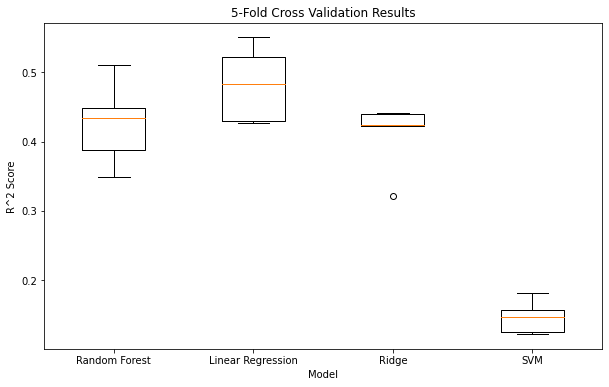

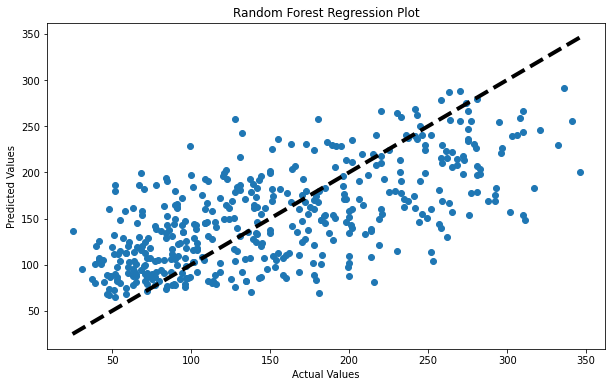

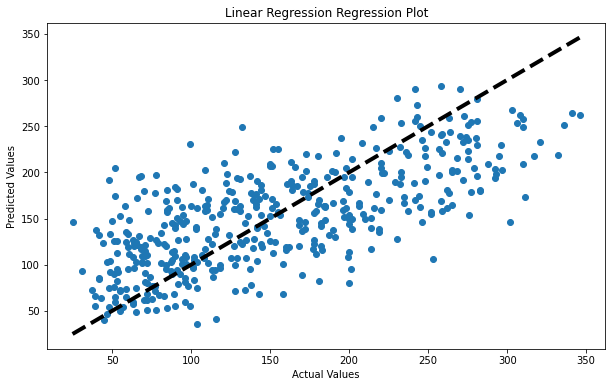

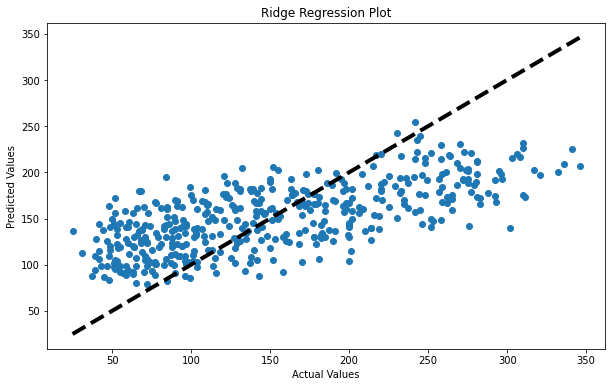

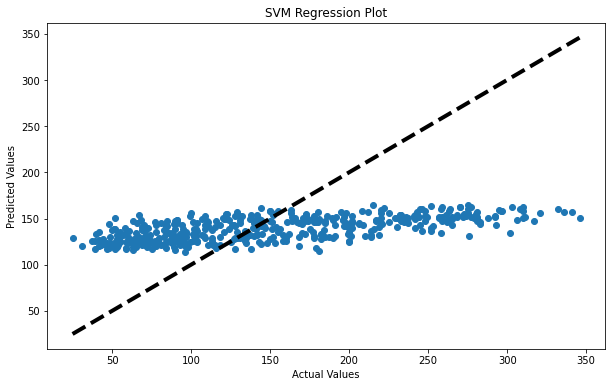

Stacking Model 5-Fold Cross Validation Scores: [0.21897874 0.48732195 0.43468505 0.34518995 0.40860191]
Mean R^2 Score: 0.3789555211023804


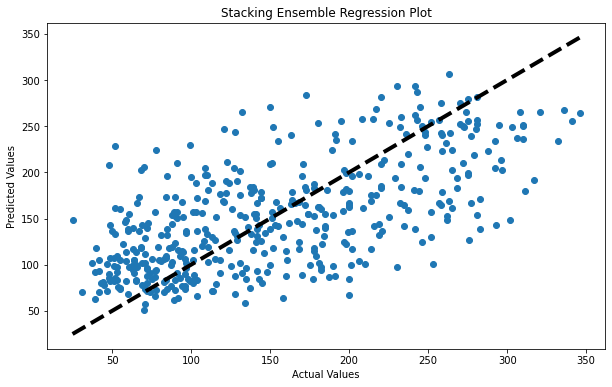

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Define the models to be used
models = {
    'Random Forest': RandomForestRegressor(),
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'SVM': SVR()
}

# Perform 5-fold cross validation for all models and save the results
cv_results = {}
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    cv_results[model_name] = cv_scores

# Generate a boxplot to compare the cross validation results
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(cv_results.values())
ax.set_xticklabels(cv_results.keys())
ax.set_title('5-Fold Cross Validation Results')
ax.set_xlabel('Model')
ax.set_ylabel('R^2 Score')
plt.show()

# Generate regression plots for each model
for model_name, model in models.items():
    y_pred = cross_val_predict(model, X, y, cv=5)
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(y, y_pred)
    ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    ax.set_title(f'{model_name} Regression Plot')
    plt.show()

# Create a Stacking ensemble model
estimators = list(models.items())
stacking = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor()
)

# Train the stacking model
stacking_scores = cross_val_score(stacking, X, y, cv=5, scoring='r2')

# Print the cross validation scores for the stacking model
print(f'Stacking Model 5-Fold Cross Validation Scores: {stacking_scores}')
print(f'Mean R^2 Score: {np.mean(stacking_scores)}')

# Generate a regression plot for the stacking model
stacking_pred = cross_val_predict(stacking, X, y, cv=5)
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(y, stacking_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title('Stacking Ensemble Regression Plot')
plt.show()


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from mlxtend.regressor import StackingCVRegressor

# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Perform data cleaning and feature extraction
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Initialize regression models
models = [LinearRegression(),
          Ridge(alpha=1.0),
          Lasso(alpha=1.0),
          ElasticNet(alpha=1.0, l1_ratio=0.5),
          DecisionTreeRegressor(),
          RandomForestRegressor(n_estimators=100, random_state=0),
          GradientBoostingRegressor(n_estimators=100, random_state=0)]

# Initialize StackingCVRegressor
stack_gen = StackingCVRegressor(regressors=(models[:]),
                                meta_regressor=LinearRegression(),
                                use_features_in_secondary=True)

# Initialize lists to hold results
models_names = ['LR', 'Ridge', 'Lasso', 'ElasticNet', 'DTR', 'RFR', 'GBR', 'Stacking']
models_rmse = [[] for i in range(len(models_names))]
models_r2 = [[] for i in range(len(models_names))]

# Perform k-fold cross validation for each model
kfolds = KFold(n_splits=5, shuffle=True, random_state=0)
for i, (name, model) in enumerate(zip(models_names[:-1], models)):
    for train_idx, test_idx in kfolds.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        models_rmse[i].append(mean_squared_error(y_test, y_pred, squared=False))
        models_r2[i].append(r2_score(y_test, y_pred))
    print(f"{name}: RMSE = {np.mean(models_rmse[i]):.4f}, R^2 = {np.mean(models_r2[i]):.4f}")

# Perform k-fold cross validation for stacking-based ensemble learning
for train_idx, test_idx in kfolds.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    stack_gen.fit(X_train, y_train)
    y_pred = stack_gen.predict(X_test)
    models_rmse[-1].append(mean_squared_error(y_test, y_pred, squared=False))
    models_r2[-1].append(r2_score(y_test, y_pred))
print(f"Stacking: RMSE = {np.mean(models_rmse[-1]):.4f}, R^2 = {np.mean(models_r2[-1]):.4f}")



LR: RMSE = 54.5271, R^2 = 0.4892
Ridge: RMSE = 54.4926, R^2 = 0.4896
Lasso: RMSE = 54.4708, R^2 = 0.4899
ElasticNet: RMSE = 55.8944, R^2 = 0.4664
DTR: RMSE = 84.3655, R^2 = -0.2182
RFR: RMSE = 58.3333, R^2 = 0.4169
GBR: RMSE = 57.8384, R^2 = 0.4211
Stacking: RMSE = 55.7173, R^2 = 0.4680
